In [4]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# OAI dataset
df = pd.read_csv("data/2.pre_preprocessed_OAI.csv")
df.shape

# GLAD dataset
dfg = pd.read_stata("data/2.Glad.dta")

print("OAI shape:", df.shape, "GLAD shape:", dfg.shape)

OAI shape: (4308, 1819) GLAD shape: (66215, 1240)


In [6]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,V00PASE,V01PASE,PA_baseline_category,PA_followup_category
0,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1,1
1,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,37.0,1,3
2,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,61.0,1,4
3,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,470.0,184.0,10,6
4304,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,0.0,477.0,135.0,10,5
4305,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,504.0,580.0,10,10
4306,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,516.0,268.0,10,8


##### Comorbidities:

In [7]:
# GLAD
for i in range(1,31):
    column_name = f'ptb_comorbidities_{i}'
    unique_values = dfg[column_name].unique()
    print(f"Column: {column_name}, Unique values: {unique_values}")


Column: ptb_comorbidities_1, Unique values: [nan  1.  0.]
Column: ptb_comorbidities_2, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_3, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_4, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_5, Unique values: [nan  1.  0.]
Column: ptb_comorbidities_6, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_7, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_8, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_9, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_10, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_11, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_12, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_13, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_14, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_15, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_16, Unique values: [nan  0.  1.]
Column: ptb_comorbidities_17, Unique values: [nan  0.  1.]
Column

In [8]:
dfg.ptb_comorbidities_28.value_counts()

ptb_comorbidities_28
0.0    9062
1.0     480
Name: count, dtype: int64

In [9]:
# Generate the list of comorbidity column names
comorbidity_columns = [f'ptb_comorbidities_{i}' for i in range(1, 31)]

# Sum these columns to get the total number of comorbidities per individual
dfg['number_comorbidities'] = dfg[comorbidity_columns].sum(axis=1)

# Check the result by printing the first few rows of the DataFrame
print(dfg[['number_comorbidities']])


       number_comorbidities
0                       0.0
1                       0.0
2                       0.0
3                       0.0
4                       0.0
...                     ...
66210                   0.0
66211                   0.0
66212                   0.0
66213                   0.0
66214                   0.0

[66215 rows x 1 columns]


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_90748/2097597197.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['number_comorbidities'] = dfg[comorbidity_columns].sum(axis=1)


In [10]:
dfg.number_comorbidities.unique()

array([ 0.,  2.,  3.,  4.,  1.,  7.,  5.,  8.,  6.,  9., 10., 11., 12.,
       14., 13.])

In [11]:
df.V00HRTAT.unique()

array([ 0., nan,  1.])

In [12]:
# OAI
# List of the specific health-related variables
health_variables = [
    'V00HRTAT', 'V00HRTFAIL', 'V00BYPLEG', 'V00STROKE', 'V00ASTHMA', 'V00ASTMEDS',
    'V00AMWHEN', 'V00LUNG', 'V00LGMEDS', 'V00LMWHEN', 'V00ULCER', 'V00ULCERDX',
    'V00DIAB', 'V00DIABTX1', 'V00DIABTX2', 'V00DIABTX3', 'V00DIABTX4',
    'V00DIABPR1', 'V00DIABPR2', 'V00DIABPR3', 'V00KIDFXN', 'V00KIDTRAN',
    'V00RA', 'V00RAMEDS', 'V00POLYRH', 'V00LIVDAM', 'V00CANCER'
]

# Sum these columns to get the total number of specific health issues per individual
df['total_health_issues'] = df[health_variables].sum(axis=1)

# Check the result by printing the first few rows of the DataFrame
print(df[['total_health_issues']])

      total_health_issues
0                     5.0
1                     0.0
2                     0.0
3                     0.0
4                     9.0
...                   ...
4303                  0.0
4304                  6.0
4305                  0.0
4306                  0.0
4307                  0.0

[4308 rows x 1 columns]


In [13]:
df.total_health_issues.unique()

array([ 5.,  0.,  9.,  1.,  4.,  3.,  2.,  7., 13., 12.,  6.,  8., 10.,
       11.])

In [14]:
print("OAI shape:", df.shape, "GLAD shape:", dfg.shape)

OAI shape: (4308, 1820) GLAD shape: (66215, 1241)


In [15]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,V00PASE,V01PASE,PA_baseline_category,PA_followup_category,total_health_issues
0,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1,1,5.0
1,b'9230073',1.0,32400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,0.0,0.0,0.0,0.0,0.0,37.0,1,3,0.0
2,b'9726175',1.0,34200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,61.0,1,4,0.0
3,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0
4,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,b'9839030',1.0,26640.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,470.0,184.0,10,6,0.0
4304,b'9791110',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,0.0,0.0,0.0,0.0,477.0,135.0,10,5,6.0
4305,b'9115049',1.0,30300.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,504.0,580.0,10,10,0.0
4306,b'9498724',1.0,42480.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,516.0,268.0,10,8,0.0


In [16]:
dfg

,fysb_replyTime,fysb_3629,fysb_affiliationId,fysb_affiliation_samlet,fysb_organisation,fysb_region,age,gender,fysb_9344,fysb_9345,...,PT12_39672,PT12_39675,PT12_39676,Pt12_fes_i_score,PT12_39880,PT12_39881,stop_replyTime,stop_9561,stop_9563,number_comorbidities
0,2013-01-29 14:37:42,2013-01-14,11431,11431,3.0,5.0,70,1,71.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0
1,2013-01-29 14:49:19,2013-01-15,11431,11431,3.0,5.0,66,2,69.0,164.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0
2,2013-01-30 09:58:02,2013-12-06,11431,11431,3.0,5.0,44,2,102.0,178.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0
3,2013-01-30 14:10:27,2013-01-30,11475,1100,2.0,2.0,49,1,110.0,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0
4,2013-02-01 11:11:03,2013-02-01,11431,11431,3.0,5.0,67,2,82.0,169.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66210,2022-12-29 14:56:17,2022-12-29,15858,15858,3.0,3.0,72,2,64.0,157.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0
66211,2022-12-29 15:28:10,2022-12-29,16527,16527,3.0,1.0,63,2,122.0,163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0
66212,2022-12-30 08:59:11,2022-12-30,18941,18941,3.0,4.0,64,2,79.0,167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0
66213,2022-12-30 09:32:55,2022-12-30,15858,15858,3.0,3.0,69,2,65.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0


##### Create PAIN variable in baseline in OAI

In [17]:
########### Pain in baseline in OAI
# create new variable of knee pain (left knee) knee pain (right knee) in OAI to compare with VAS in GLAD
df['knee_pain_baseline'] = np.where(df['V00P7LKRCV'] > df['V00P7RKRCV'], df['V00P7LKRCV'], df['V00P7RKRCV'])
########### Pain in followup in OAI
# create new variable of knee pain (left knee) knee pain (right knee) in OAI to compare with VAS in GLAD
df['knee_pain_follow'] = np.where(df['V01P7LKRCV'] > df['V01P7RKRCV'], df['V01P7LKRCV'], df['V01P7RKRCV'])

In [18]:
df['knee_pain_baseline'] = df['knee_pain_baseline'] * 10
df['knee_pain_follow'] = df['knee_pain_follow'] * 10

##### Depression: Make mappable depression in GLAD with OAI

In [19]:
# In GLAD:
print("Before maping: ")
print(dfg['ptb_14618'].value_counts())

mapping_dict = {
    1: 1,  # Not anxious or depressed
    2: 1,  # Slightly anxious or depressed
    3: 2,  # Moderately anxious or depressed
    4: 3,  # Severely anxious or depressed
    5: 4   # Extremely anxious or depressed
}

# Apply the mapping to the 'ptb_14618' column
dfg['ptb_14618_depression'] = dfg['ptb_14618'].map(mapping_dict)
print("------------------------------")
print("After maping: ")
print(dfg['ptb_14618_depression'].value_counts())

Before maping: 
ptb_14618
1.0    41887
2.0     9477
3.0     3091
4.0      627
5.0       63
Name: count, dtype: int64
------------------------------
After maping: 
ptb_14618_depression
1.0    51364
2.0     3091
3.0      627
4.0       63
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_90748/2641146032.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['ptb_14618_depression'] = dfg['ptb_14618'].map(mapping_dict)


In [20]:
# In OAI:
print(df['V00CESD6'].value_counts())

V00CESD6
1.0    3323
2.0     792
3.0      92
4.0      53
Name: count, dtype: int64


##### Employment status

In [21]:
# OAI
# Define the mapping dictionary
mapping_dict = {
    1: 1,  # Value 1 maps to 1
    3: 2,  # Value 3 maps to 2
    4: 3   # Value 4 maps to 3
}
# Apply the mapping to the 'V00CEMPLOY' column and create a new column 'Employment_Status'
df['V00CEMPLOY_employment'] = df['V00CEMPLOY'].map(mapping_dict)

In [22]:
df.V00CEMPLOY_employment.value_counts()

V00CEMPLOY_employment
1.0    2661
3.0    1376
2.0     203
Name: count, dtype: int64

In [23]:
dfg.ptb_3777.value_counts()

ptb_3777
4.0    30076
1.0    17518
6.0     2876
7.0     1750
3.0     1402
2.0     1311
5.0     1098
Name: count, dtype: int64

In [24]:
# GLAD
# Define the mapping dictionary
mapping_dict = {
    1: 1,  # Value 1 maps to 1
    2: 2,  # Value 2 maps to 2
    5: 3   # Value 5 maps to 3
}
# Apply the mapping to the 'V00CEMPLOY' column and create a new column 'Employment_Status'
dfg['ptb_3777_employment'] = dfg['ptb_3777'].map(mapping_dict)

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_90748/3227345162.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['ptb_3777_employment'] = dfg['ptb_3777'].map(mapping_dict)


In [25]:
dfg.ptb_3777_employment.value_counts()

ptb_3777_employment
1.0    17518
2.0     1311
3.0     1098
Name: count, dtype: int64

##### Ethnicity

In [26]:
# GLAD
print("Born in Denmark: ",dfg.ptb_10223.value_counts())
print("---------------------------- ")
print("Danish citizenship: ",dfg.ptb_10224.value_counts())

# 1: Yes
# 2: No

Born in Denmark:  ptb_10223
1.0    53753
2.0     2223
Name: count, dtype: int64
---------------------------- 
Danish citizenship:  ptb_10224
1.0    55037
2.0      939
Name: count, dtype: int64


In [27]:
# OAI
print("Racial background: ",df.P02RACE.value_counts())
# 0: Other Non-white
# 1: White or Caucasian 
# 2: Black or African American 
# 3: Asian


Racial background:  P02RACE
1.0    3475
2.0     727
0.0      63
3.0      39
Name: count, dtype: int64


In [28]:
print("OAI shape:", df.shape, "GLAD shape:", dfg.shape)

OAI shape: (4308, 1823) GLAD shape: (66215, 1243)


##### Distribution age:

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


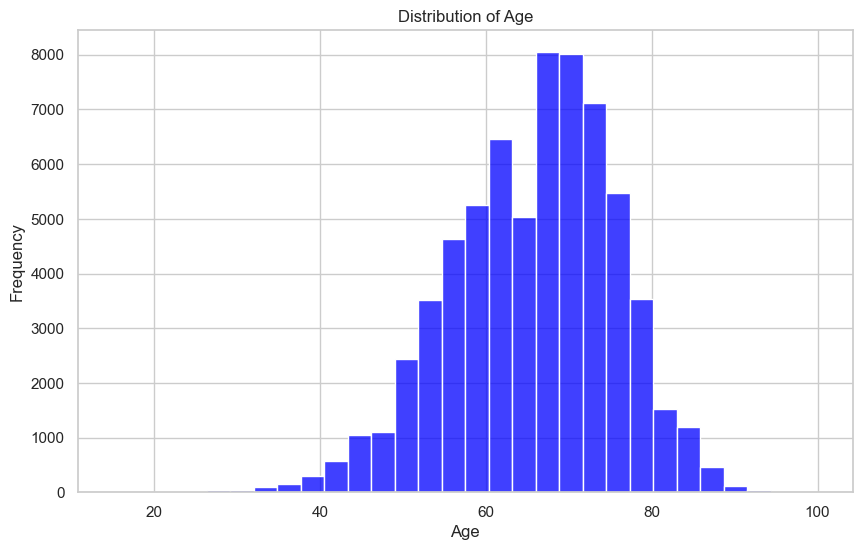

In [29]:
# In GLAD:


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a histogram of the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(dfg['age'], kde=False, color='blue', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [30]:
# dfg.age.describe()

In [31]:
# # Count entries where age is less than 45
# count_under_45 = (dfg['age'] < 45).sum()

# print("Number of cases with age under 45:", count_under_45)

In [32]:
# # Filter the DataFrame to only include rows where age is greater than 45
# dfg = dfg[dfg['age'] > 44]

# # Optional: if you want to specifically create a new column that simply reiterates their age
# # (though it would be redundant), you could do the following:
# dfg['age_above45'] = dfg['age']

# # Check the filtered DataFrame
# print(dfg.head())

In [33]:
# dfg.age_above45.describe()

##### Variables

In [34]:
oai_variables = [
'V00AGE',
'P02SEX',
'P01BMI',
'V00CESD6',
'V00CEMPLOY_employment',

'PA_baseline_category', 
'PA_followup_category',
'V00KOOSQOL', 
'V01KOOSQOL',
'knee_pain_baseline',
'knee_pain_follow',


]

glad_variables = [
# 'age_above45',
'age',
'gender',
'fysb_BMI',
'ptb_14618_depression',
'ptb_3777_employment',

'ptb_4145', 
'pt12_4145', 
'ptb_koos_qol_score', 
'pt12_koos_qol_score',
'ptb_3764', 
'pt12_3764',

]

##### Number of missing value

In [35]:
# OAI
df[oai_variables].isna().sum()


V00AGE                    0
P02SEX                    0
P01BMI                    4
V00CESD6                 48
V00CEMPLOY_employment    68
PA_baseline_category      0
PA_followup_category      0
V00KOOSQOL                1
V01KOOSQOL                0
knee_pain_baseline       21
knee_pain_follow         43
dtype: int64

In [36]:
# GLAD 
dfg[glad_variables].isna().sum()

age                         0
gender                      0
fysb_BMI                  472
ptb_14618_depression    11070
ptb_3777_employment     46288
ptb_4145                10207
pt12_4145               34525
ptb_koos_qol_score      25813
pt12_koos_qol_score     43281
ptb_3764                10255
pt12_3764               34562
dtype: int64

##### Drop NA 

In [37]:
# OAI
df_new = df[oai_variables].dropna()
# GLAD
dfg_new = dfg[glad_variables].dropna()

print("OAI shape:", df_new.shape, "GLAD shape:", dfg_new.shape)


OAI shape: (4131, 11) GLAD shape: (7603, 11)


In [38]:
df_new.to_csv("data/3.preprocessed_OAI.csv", index=False)
dfg_new.to_csv("data/3.preprocessed_Glad.csv", index=False)

In [39]:
dfg_new

,age,gender,fysb_BMI,ptb_14618_depression,ptb_3777_employment,ptb_4145,pt12_4145,ptb_koos_qol_score,pt12_koos_qol_score,ptb_3764,pt12_3764
861,50,2,22.68,1.0,1.0,10.0,10.0,31.25,56.25,65.0,17.0
866,45,1,29.07,1.0,1.0,7.0,10.0,25.00,43.75,96.0,52.0
872,46,2,26.10,1.0,1.0,3.0,9.0,68.75,62.50,39.0,25.0
874,53,2,28.03,1.0,1.0,4.0,4.0,62.50,87.50,15.0,2.0
877,68,2,27.82,1.0,1.0,8.0,10.0,87.50,93.75,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
60207,55,2,35.63,1.0,1.0,8.0,10.0,50.00,56.25,57.0,9.0
60258,61,2,29.34,1.0,1.0,3.0,6.0,25.00,68.75,55.0,8.0
60260,62,1,25.88,1.0,1.0,3.0,3.0,50.00,25.00,26.0,77.0
60297,47,2,26.51,1.0,1.0,4.0,2.0,43.75,18.75,47.0,92.0


In [40]:
df_new

,V00AGE,P02SEX,P01BMI,V00CESD6,V00CEMPLOY_employment,PA_baseline_category,PA_followup_category,V00KOOSQOL,V01KOOSQOL,knee_pain_baseline,knee_pain_follow
0,78.0,1.0,27.6,1.0,3.0,1,1,50.00,68.75,80.0,50.0
1,76.0,2.0,27.4,1.0,3.0,1,3,100.00,62.50,0.0,40.0
2,69.0,1.0,29.8,1.0,3.0,1,4,81.25,100.00,10.0,0.0
3,68.0,2.0,30.1,2.0,3.0,1,1,75.00,81.25,30.0,30.0
4,76.0,1.0,32.4,1.0,2.0,1,1,75.00,68.75,30.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
4302,56.0,1.0,24.1,1.0,1.0,10,9,100.00,100.00,0.0,0.0
4303,59.0,2.0,30.5,1.0,1.0,10,6,43.75,68.75,70.0,70.0
4304,70.0,1.0,33.9,1.0,3.0,10,5,100.00,100.00,0.0,0.0
4306,52.0,1.0,30.7,1.0,1.0,10,8,31.25,37.50,50.0,70.0
